**Problem 9: Implement k-Nearest Neighbor algorithm to classify the iris data set.**

In [1]:
# Problem 9: Implement k-Nearest Neighbors (kNN) Algorithm
# Dataset: Iris Species (Kaggle / UCI)

In [6]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
# Set visualization style
sns.set(style="whitegrid", palette="pastel")

In [8]:
# Load the Dataset
file_path = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
sayem = pd.read_csv(file_path)

In [9]:
# Explore the Dataset
print("First 5 Rows of Dataset:")
display(sayem.head())

First 5 Rows of Dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
print("\n Dataset Info:")
sayem.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
print("\n Summary Statistics:")
display(sayem.describe())


 Summary Statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
print("\n Missing Values Check:")
print(sayem.isnull().sum())


 Missing Values Check:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


/tmp/ipython-input-1178646719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=sayem, palette='Set2')


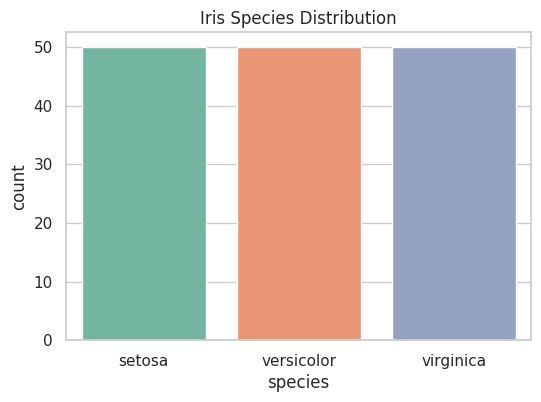

In [13]:
# Visualize Basic Distributions
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=sayem, palette='Set2')
plt.title("Iris Species Distribution")
plt.show()

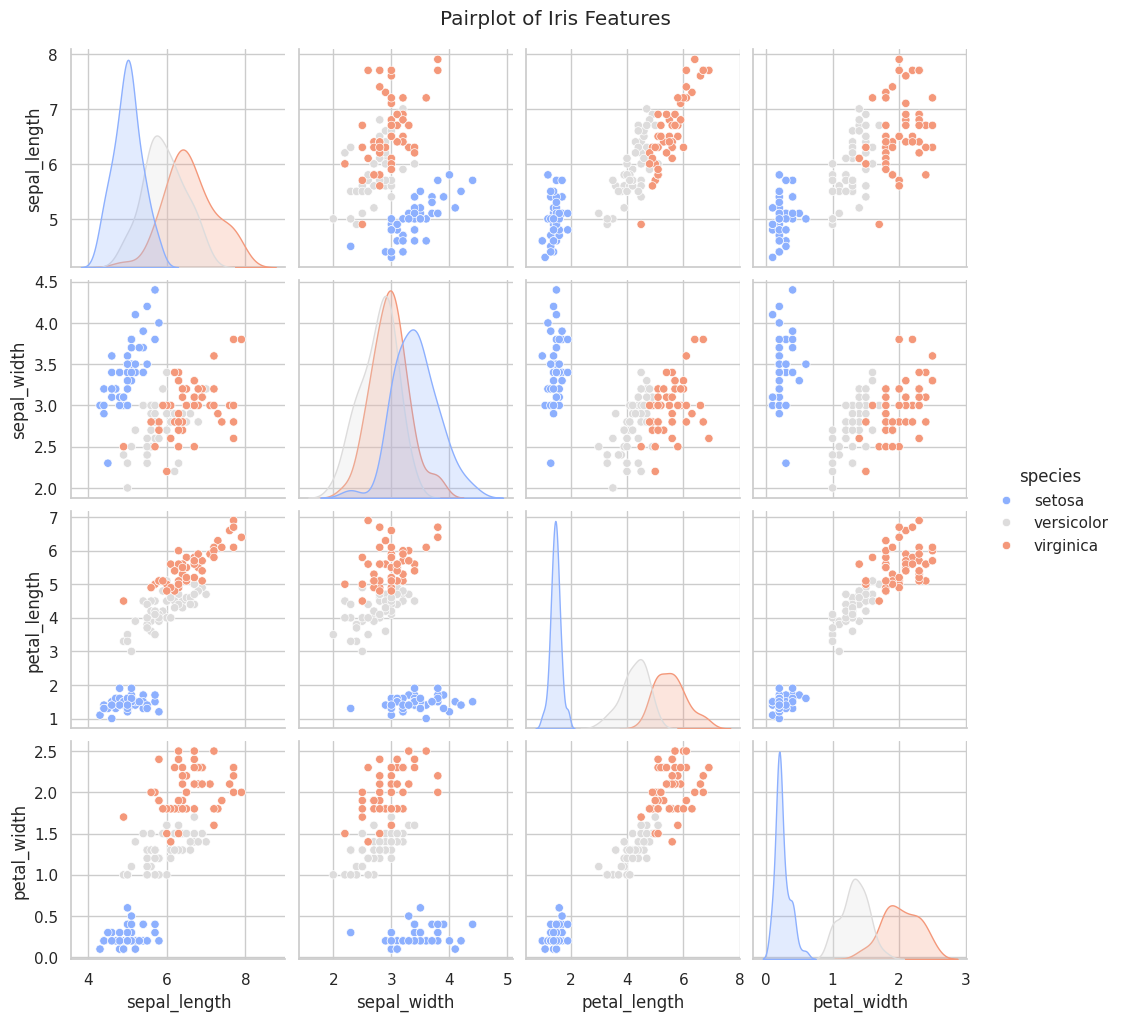

In [14]:
sns.pairplot(sayem, hue='species', palette='coolwarm')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

In [15]:
# Preprocessing
X = sayem.drop('species', axis=1)
y = sayem['species']

In [16]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)
print("\n Data Split Completed (75% Train, 25% Test)")


 Data Split Completed (75% Train, 25% Test)


In [23]:
# Build kNN Model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
print(f"\n KNN Model Trained Successfully with k = {k}")


 KNN Model Trained Successfully with k = 5


In [24]:
# Predictions and Evaluation
y_pred = knn.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

In [26]:
print(f"\n Accuracy: {accuracy:.2f}")


 Accuracy: 1.00


In [29]:
print("\n Confusion Matrix:")
print(cm)
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



/tmp/ipython-input-395224776.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), ax=ax2, palette='cool')
/tmp/ipython-input-395224776.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, ax=ax5, palette='Spectral')


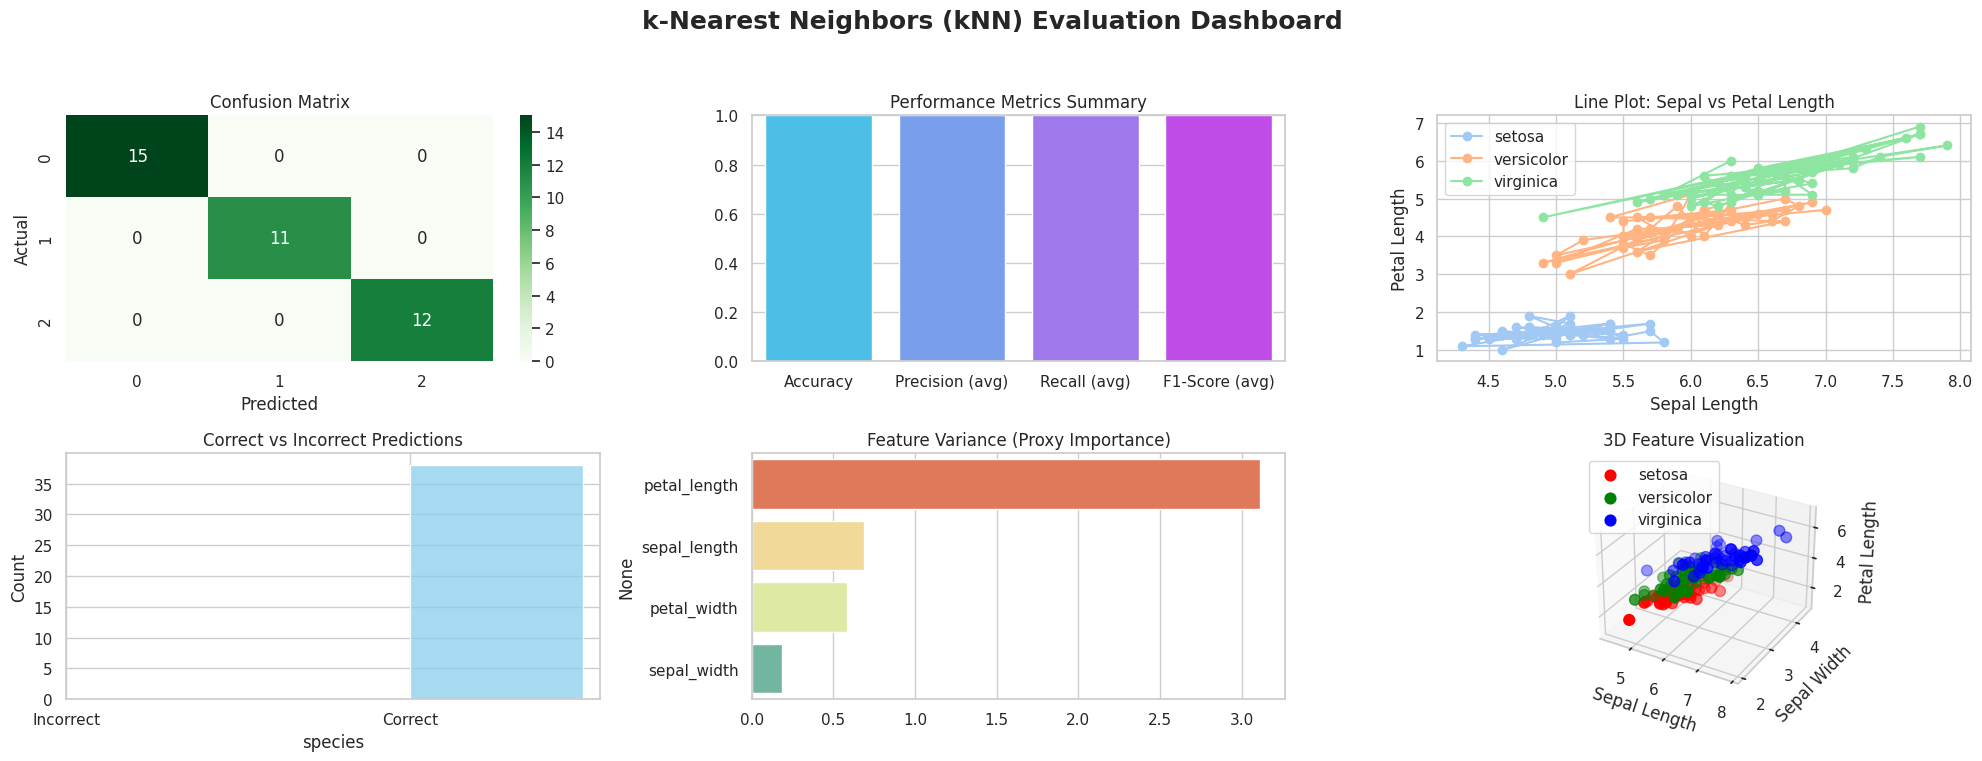

In [34]:
fig = plt.figure(figsize=(20, 8))
fig.suptitle("k-Nearest Neighbors (kNN) Evaluation Dashboard", fontsize=18, fontweight='bold')

# Subplots layout
ax1 = plt.subplot2grid((2,3),(0,0))
ax2 = plt.subplot2grid((2,3),(0,1))
ax3 = plt.subplot2grid((2,3),(0,2))
ax4 = plt.subplot2grid((2,3),(1,0))
ax5 = plt.subplot2grid((2,3),(1,1))
ax6 = plt.subplot2grid((2,3),(1,2), projection='3d')

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")

# Accuracy Summary
metrics = {
    'Accuracy': accuracy,
    'Precision (avg)': np.mean([report[i]['precision'] for i in report if i in y.unique()]),
    'Recall (avg)': np.mean([report[i]['recall'] for i in report if i in y.unique()]),
    'F1-Score (avg)': np.mean([report[i]['f1-score'] for i in report if i in y.unique()])
}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), ax=ax2, palette='cool')
ax2.set_title("Performance Metrics Summary")
ax2.set_ylim(0,1)

# Line Plot – Sepal Length vs Petal Length
for species in sayem['species'].unique():
    subset = sayem[sayem['species'] == species]
    ax3.plot(subset['sepal_length'], subset['petal_length'], marker='o', label=species)
ax3.set_title("Line Plot: Sepal vs Petal Length")
ax3.set_xlabel("Sepal Length")
ax3.set_ylabel("Petal Length")
ax3.legend()

# Residual Plot (Correct vs Incorrect)
correct = (y_test == y_pred)
sns.histplot(correct, kde=False, bins=2, color='skyblue', ax=ax4)
ax4.set_title("Correct vs Incorrect Predictions")
ax4.set_xticks([0,1])
ax4.set_xticklabels(['Incorrect','Correct'])

# Feature Importance (kNN has none, use variance importance proxy)
importance = pd.Series(X.var(), index=X.columns).sort_values(ascending=False)
sns.barplot(x=importance.values, y=importance.index, ax=ax5, palette='Spectral')
ax5.set_title("Feature Variance (Proxy Importance)")

# 3D Plot – Sepal vs Petal Dimensions
colors = {'setosa':'red','versicolor':'green','virginica':'blue'}
for species in sayem['species'].unique():
    subset = sayem[sayem['species'] == species]
    ax6.scatter(subset['sepal_length'], subset['sepal_width'],
                subset['petal_length'], color=colors[species], label=species, s=60)
ax6.set_title("3D Feature Visualization")
ax6.set_xlabel("Sepal Length")
ax6.set_ylabel("Sepal Width")
ax6.set_zlabel("Petal Length")
ax6.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [36]:
print(f"""
MODEL SUMMARY
Algorithm Used: k-Nearest Neighbors (k = {k})
Dataset: Iris Species (UCI / Kaggle)
Accuracy: {accuracy*100:.2f}%
Major Evaluation Metrics:
   - Precision: {metrics['Precision (avg)']:.2f}
   - Recall: {metrics['Recall (avg)']:.2f}
   - F1-Score: {metrics['F1-Score (avg)']:.2f}

  The KNN model successfully classifies
  iris flowers into 3 species based on features.
""")


MODEL SUMMARY
Algorithm Used: k-Nearest Neighbors (k = 5)
Dataset: Iris Species (UCI / Kaggle)
Accuracy: 100.00%
Major Evaluation Metrics:
   - Precision: 1.00
   - Recall: 1.00
   - F1-Score: 1.00

  The KNN model successfully classifies 
  iris flowers into 3 species based on features.

